### Libraries import

In [2]:
import pandas as pd
import squarify
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

### Style

In [3]:
from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

### Data import

In [4]:
dataset = pd.read_csv('./../data/fuoriuscita/utenti_1522/Tipologia di utenza (2013 - 2022).csv')

dataset

,ITTER107,Territorio,TIPO_DATO_1522,Tipo dato,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,Sesso,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2013,2013,50.68,NaN,NaN
1,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2014,2014,55.63,NaN,NaN
2,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2015,2015,54.22,NaN,NaN
3,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2016,2016,55.11,NaN,NaN
4,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2017,2017,52.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2018,2018,55.63,NaN,NaN
96,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2019,2019,48.40,NaN,NaN
97,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2020,2020,68.08,NaN,NaN
98,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2021,2021,60.60,NaN,NaN


Ottenimento dati nazionali ed eliminazione di dati inutili e/o ridondanti:

In [5]:
country_data = dataset[dataset['ITTER107'] == 'IT'] # ottiene solo dati nazionali

# rimozione di:
# - "Seleziona periodo" e "Sesso" che contengono dati ridondanti rispettivamente di "TIME" e "SEXISTAT1"
# - "ITTER107" e "Territorio" in quanto non vi è più alcuna distinzione, i dati mantenuti sono tutti nazionali
# - "Flag Codes" e "Flags" in quanto inutili
# - "TIPO_DATO_1522" e "Tipo dato" in quanto non utilizzati e ridondanti
# - "SEXISTAT1" in quanto i dati non presentano dist
country_data = country_data.drop(columns=['Seleziona periodo', 'Sesso', 'Flag Codes', 'Flags', 'Territorio', 'ITTER107', 'TIPO_DATO_1522', 'Tipo dato'])

country_data

,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,TIME,Value
0,ALL_VAL,chiamate valide,T,2013,50.68
1,ALL_VAL,chiamate valide,T,2014,55.63
2,ALL_VAL,chiamate valide,T,2015,54.22
3,ALL_VAL,chiamate valide,T,2016,55.11
4,ALL_VAL,chiamate valide,T,2017,52.30
...,...,...,...,...,...
95,USERS_CAL,utenti che chiamano per sè,T,2018,55.63
96,USERS_CAL,utenti che chiamano per sè,T,2019,48.40
97,USERS_CAL,utenti che chiamano per sè,T,2020,68.08
98,USERS_CAL,utenti che chiamano per sè,T,2021,60.60


Rimozione dei dati totali (aggregati) o non definiti per la tipologia dell'utenza e ritenzione solo dei più recenti (2022):

In [6]:
country_data = country_data[(country_data["TIPUTENZA2"] != 'ALL_VAL') & (country_data["TIME"] == 2022)]

country_data

,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,TIME,Value
19,OPERATORS,da operatori,T,2022,1.21
29,FRIEND_ACQU,da parenti/amici/conoscenti,T,2022,2.26
39,OTH_VALID,altre chiamate valide,T,2022,0.51
49,ERROR,chiamate errate,T,2022,36.62
59,STLK,molestatori,T,2022,6.02
69,JOKE,per motivi non pertinenti (scherzi),T,2022,0.46
79,WRONG_NUM,per numero errato,T,2022,30.13
89,TOT,totale,T,2022,100.00
99,USERS_CAL,utenti che chiamano per sè,T,2022,59.41


Rimozione dato aggregato del totale e delle chiamate errate:

In [7]:
country_data = country_data[(country_data['TIPUTENZA2'] != 'TOT') & 
                            (country_data['TIPUTENZA2'] != 'JOKE') &
                            (country_data['TIPUTENZA2'] != 'WRONG_NUM')]
country_data

,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,TIME,Value
19,OPERATORS,da operatori,T,2022,1.21
29,FRIEND_ACQU,da parenti/amici/conoscenti,T,2022,2.26
39,OTH_VALID,altre chiamate valide,T,2022,0.51
49,ERROR,chiamate errate,T,2022,36.62
59,STLK,molestatori,T,2022,6.02
99,USERS_CAL,utenti che chiamano per sè,T,2022,59.41


### Plot

Definizione della palette colori:

In [8]:
palette = ["#F7DEE5", "#EEC1D2", "#D791B5", "#C4679B", "#AC4187", "#7D275C", "#481437"]

Primo plot utilizzando direttamente il metodo `plot` della libreria `squarify`:

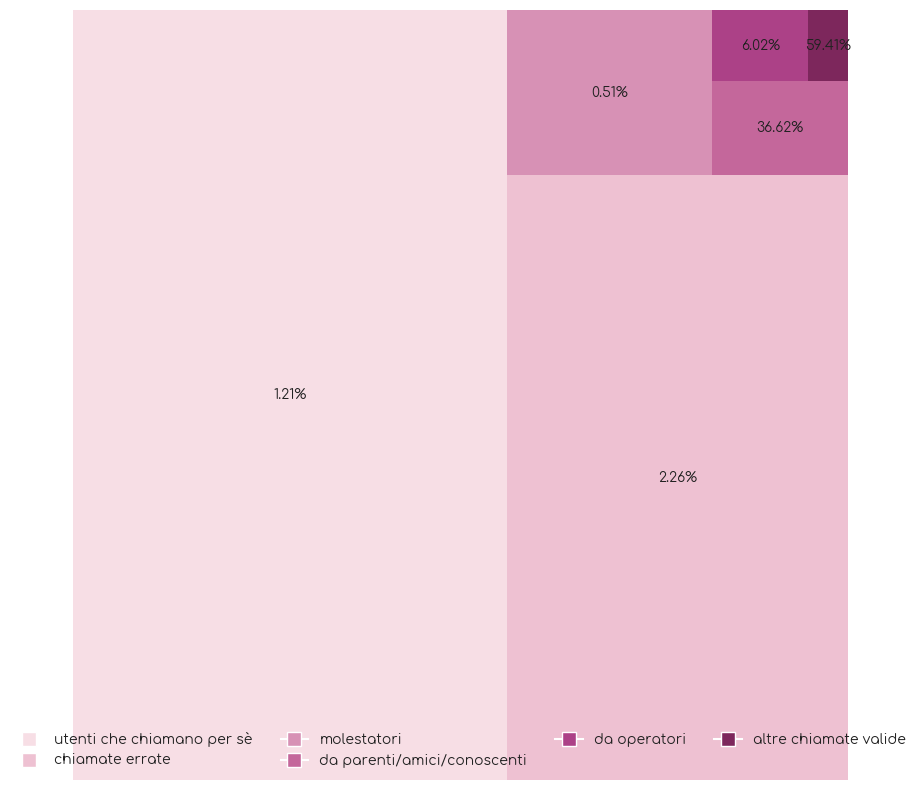

In [9]:
labels = [str(value) + '%' for value in country_data['Value'].values]

country_data = country_data.sort_values(by=['Value'], ascending=False)
squarify.plot(sizes=country_data['Value'], label=labels, color=palette)

# legenda custom
legend_squares = [Line2D([], [], color='white', marker='s', markersize=10, markerfacecolor=x) for x in palette]
legend_labels = [x for x in country_data['Tipologia di utenza'].values]
plt.legend(legend_squares, legend_labels, loc=8, ncol=4, frameon=False)

plt.axis('off')
plt.show()

Bene ma non benissimo, in primo luogo la legenda si sovrappone e non si ha il diretto controllo sulla `figure` di `matplotlib`, in secondo luogo vorrei differenziare la dimensione dei font in base al fatto che ci stia o meno nel rettengolo corrispondente (i.e. se nel più piccolo più di `16` non ci sta non è giusto che la medesima font size venga utilizzata anche negli altri avendo globalmente dei testi piccoli), infine, vorrei avere testi a contrasto rispetto al colore del rettangolo: su rettangoli chiari testi scuri e viceversa.

Procedo a costruirlo in maniera custom:

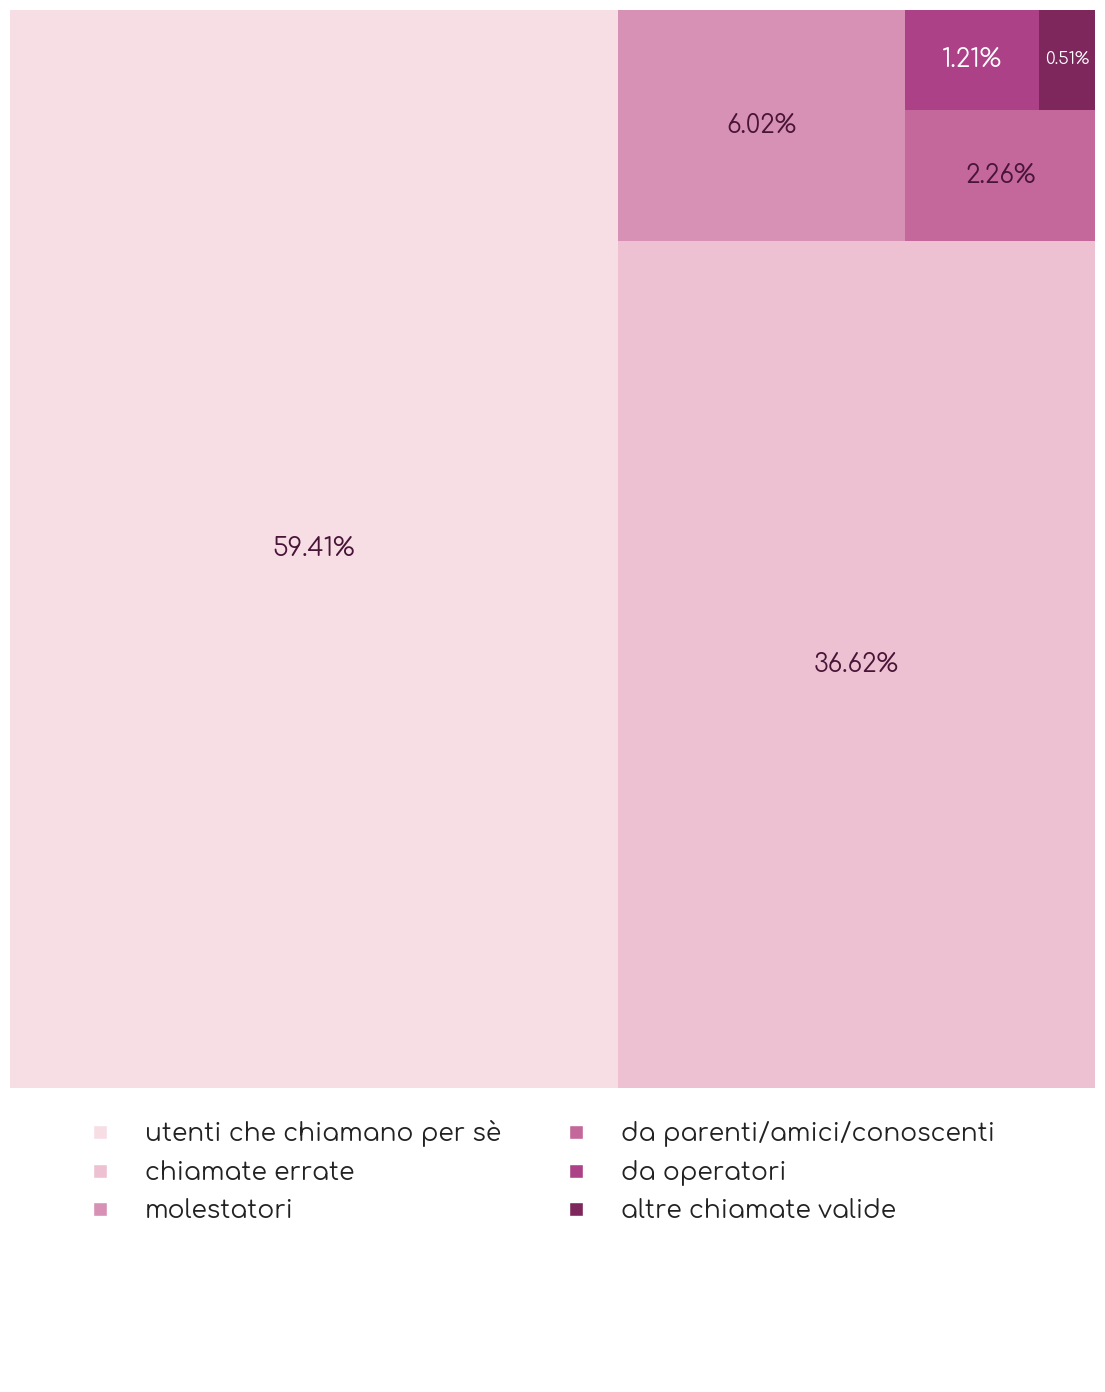

In [10]:
# data sorting
country_data = country_data.sort_values(by=['Value'], ascending=False)

# label del grafico, contengono solo la percentuale,la relativa categoria sarà nella legenda
labels = [str(percentage) for percentage in country_data['Value']]

# posizione di inizio
x, y = 0., 0.
# larghezza e altezza
plot_width, plot_height = 500., 500.

# normalizzazione dei valori per riempire l'area del plot (plot_width * plot_height)
values = squarify.normalize_sizes(country_data['Value'].tolist(), plot_width, plot_height)

# calcolo della posizione dei rettangoli
rectangles = squarify.squarify(values, 0., 0., 500., 500.)

# inizio del plot
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')

# rimozione assi e ticks
ax.axis('off') 
plt.xticks([])
plt.yticks([])

# definizione dei limiti del plot
xlim = max(r['x'] + r['dx'] for r in rectangles)
ylim = max(r['y'] + r['dy'] for r in rectangles)
plt.xlim(0, xlim)
plt.ylim(0, ylim)

# idx -> indice del rettangolo corrente
# rectangle -> rettangolo corrente
# percentage -> stringa che contiene la percentuale di utenti corrispondente al rettangolo
# color -> colore corrente (da usare per il rettangolo) preso dalla palette
for idx, rectangle, percentage, color in zip(range(0, len(labels)), rectangles, labels, palette):
    # ottenimento dei dettagli del rettangolo
    x, y, dx, dy = rectangle['x'], rectangle['y'], rectangle['dx'], rectangle['dy']
    # creazione del rettangolo
    ax.add_patch(plt.Rectangle((rectangle['x'], rectangle['y']),
                               rectangle['dx'], 
                               rectangle['dy'], 
                               facecolor=color))

    # selezione del colore del font in modo che sia a contrasto col colore del rettangolo
    font_color = 'white' if idx > 3 else palette[-1]
    # selezione della dimensione della label in base alla dimensione (area) del rettangolo
    font_size = 18 if dx*dy > 1500 else 12

    # impostazione della label
    plt.annotate(percentage + '%', (x+dx/2,y+dy/2), size=font_size, color=font_color, va='center', ha='center')

# legenda custom
legend_squares = [Line2D([], [], color='white', marker='s', markersize=10, markerfacecolor=x) for x in palette]
legend_labels = [x for x in country_data['Tipologia di utenza'].values]
# previene l'overlap della legenda con il grafico
legend_ax = fig.add_axes([0.2, -0.1, 0.6, 0.3])  
legend_ax.axis('off')  
legend_ax.legend(legend_squares, legend_labels, loc='center', ncol=2, frameon=False, prop={'size': 18})
legend_ax.set_xlim(0, 1)
legend_ax.set_ylim(0, 1)

plt.show()